# Apriori Algorithm using R
@Author: Swapnil Vivek Kulkarni

In [1]:
#install.packages('arules')
library(arules)

Warning message:
"package 'arules' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"
Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



In [2]:
dataset = read.csv('Market_Basket_Optimisation.csv', header = FALSE)
#Read all the transactions in sparce matrix
dataset = read.transactions('Market_Basket_Optimisation.csv', sep=',', rm.duplicates = TRUE)
summary(dataset)

distribution of transactions with duplicates:
1 
5 


transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

This dataset contains 7500 observations of 20 columns, customer baugh maximun 20 items one time
In above code we have created sparx matrix aand removed duplicate entries

###### Above summary shows:
transactions as itemMatrix in sparse format with
7501 rows (elements/itemsets/transactions) and
119 columns (items) and a density of 0.03288973

It says there are 3% non zero valus in sparce matrix
 


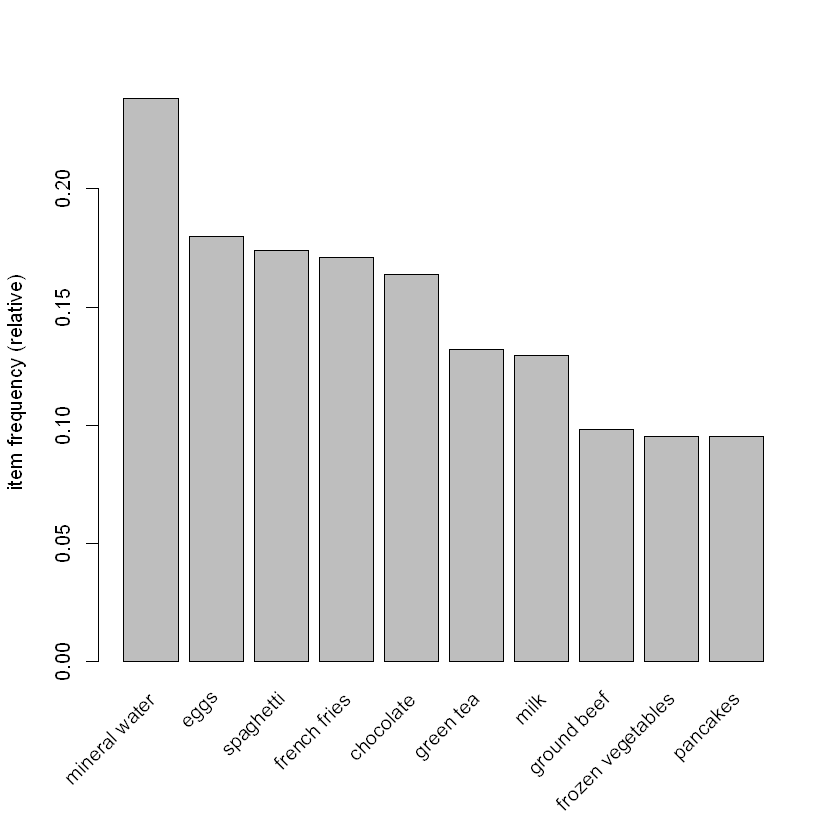

In [3]:
#Plot top 10 highest purchased products from dataset 
itemFrequencyPlot(dataset,topN=10)

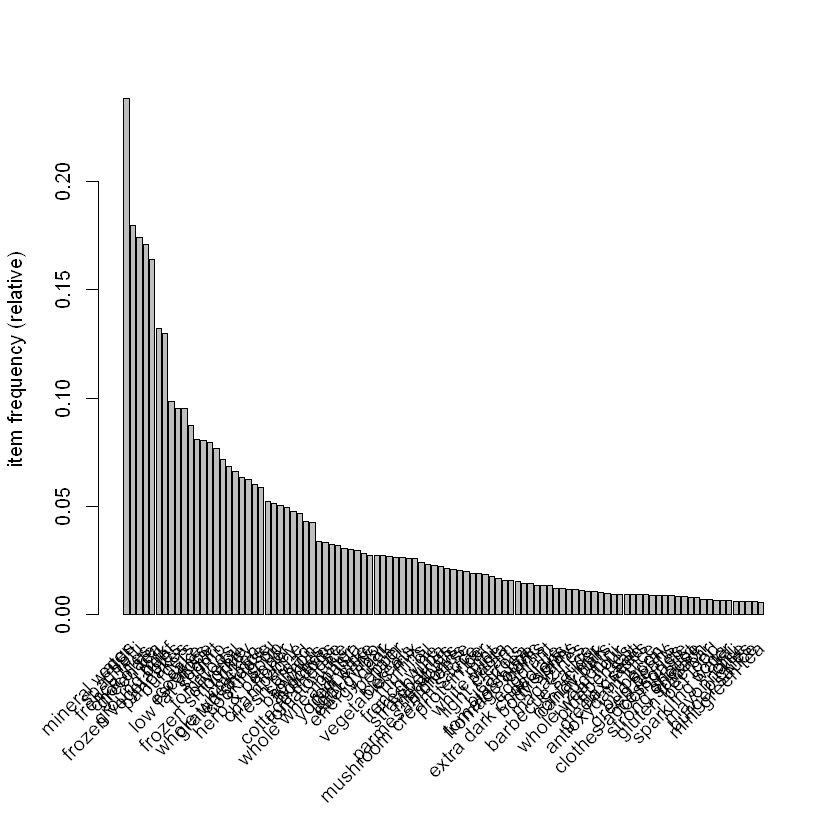

In [5]:
#Plot top 100 highest purchased products from dataset 
itemFrequencyPlot(dataset,topN=100)

We are not interested for all the products, to increase the revenue need to optimize sale of products which has large demand.
Here we will work on products which has minimum support of 3.
3 * 7 Days = 21 there should be at least 21 transactions per week
#### Support = 3(minimum product sale per day) * 7(Days of week) / 7500(Total number of transactions in dataset)


In [4]:
#Training Apriori on dataset
#Support calculated by 3*7/7500 = 0.0028 where as procuct purchased atleast three times per day within entire 7500 customers
#Confidence is 40%
rules = apriori(data=dataset, parameter = list(support=0.0028, confidence=0.4))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5  0.0028      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 21 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [304 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [6]:
#visualizing the result 
inspect(sort(rules, by='lift')[1:10])

     lhs                                            rhs                
[1]  {mineral water,whole wheat pasta}           => {olive oil}        
[2]  {spaghetti,tomato sauce}                    => {ground beef}      
[3]  {french fries,herb & pepper}                => {ground beef}      
[4]  {cereals,spaghetti}                         => {ground beef}      
[5]  {frozen vegetables,mineral water,soup}      => {milk}             
[6]  {chocolate,herb & pepper}                   => {ground beef}      
[7]  {chocolate,mineral water,shrimp}            => {frozen vegetables}
[8]  {herb & pepper,shrimp}                      => {ground beef}      
[9]  {frozen vegetables,mineral water,olive oil} => {milk}             
[10] {cereals,ground beef}                       => {spaghetti}        
     support     confidence coverage    lift     count
[1]  0.003866151 0.4027778  0.009598720 6.115863 29   
[2]  0.003066258 0.4893617  0.006265831 4.980600 23   
[3]  0.003199573 0.4615385  0.006932409 4.6

#### Details
Above details shows top ten associated products which are picked by customer